## 1.投資報酬率計算

Description

請寫一程式，引導使用者首先輸入股票買入價格與張數(以空格區隔)，接著再輸入股票賣出價格與張數(以空格區隔)，然後程式會輸出淨收益與投資報酬率。

已知買賣股票所需的成本如下：  
買進：手續費率 = 0.1425%  
賣出：手續費率 + 交易稅率 = 0.1425% + 0.3%  
請將手續費與交易稅四捨五入到整數!  

Input:  
    假設購買股價為10元的新光金1張，第一行輸入為: 10 1  
    並在股價為13.75元時賣掉1張，第二行輸入為: 13.75 1  

output:  
    輸出本次交易的 淨收益 = 賣出獲利(交易價格-手續費-交易稅) - 買進成本(交易價格+手續費)  
    輸出投資報酬率(%) = 淨收益 / 買進成本   

    輸入範例1：  
        10 1  
        13.75 1  
        
    輸出範例1:  
        3675  
        36.7

    輸入範例2：
        579 10
        604 10
        
    輸出範例2:
        215022
        3.71
    

In [1]:
buy = input()
sell = input()
buy_p, buy_n = buy.split(' ')
sell_p, sell_n = sell.split(' ')
price = float(buy_n) * 1000 * float(buy_p)
cost = price + round(price * 0.001425)
price = float(sell_n) * 1000 * float(sell_p)
profit = price - round(price * (0.001425 + 0.003))
income = int(profit - cost)
print(income)
ROI = income / cost
print(round(ROI * 100, 2))

10 1
13.75 1
3675
36.7


## 2.現金股利與填息天數

Description  

   已知[2886_兆豐金csv](2886.csv)檔案紀錄兆豐金歷年發放的現金股利(dividend)與填息天數(ex-dividend_days)，  
   請依據資料繪製歷年現金股利的長條圖與歷年填息天數的折線圖。  
   請將圖片大小設定為(12,8)，並同時須加上標題、X和Y軸的名稱。  
   加分題:計算出歷年平均現金股利與天數並以圖利的方式顯示在圖表上。
    
範例如下:
![](2886.png)



歷年平均現金股利: 1.25 元
歷年平均填息天數: 83.37 天


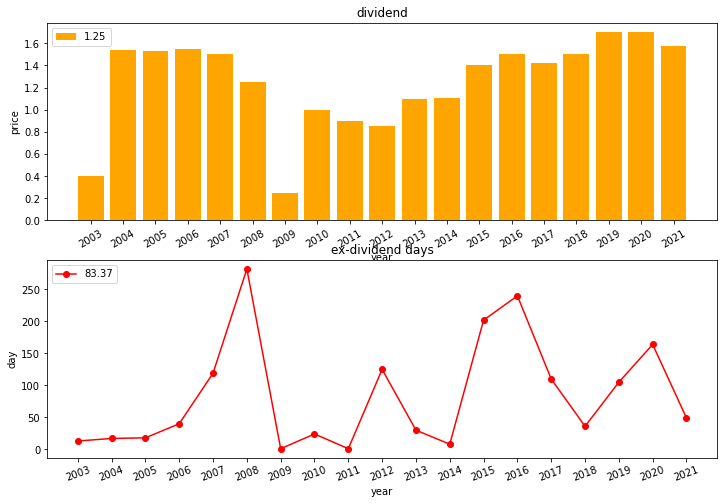

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('2886.csv')
#print(data.columns)
day = data['year']
price = data['dividend']
mean_p = round(price.mean(),2)
#print("歷年平均現金股利:", mean_p, '元')
d = data['day']
mean_d = round(d.mean(),2)
#print("歷年平均填息天數:", mean_d, '天')
x = np.arange(len(day))

plt.figure(figsize = (12,8))
plt.subplot(211)
plt.bar(x,price,color = 'orange', label = mean_p)
plt.xticks(x, day, rotation = 30)
plt.legend()
plt.xlabel('year')
plt.ylabel('price')
plt.title('dividend')

plt.subplot(212)
plt.plot(x,d,'o-r', label = mean_d)
plt.legend(loc = 2)
plt.xticks(x, day, rotation = 20)
plt.title('ex-dividend days')
plt.xlabel('year')
plt.ylabel('day')
plt.show()

## 3.現金股利與填息天數

Description  

   已知[2377_微星.csv](2377.csv)檔案紀錄微星2020至今的股價資訊，  
   請依據資料**將2021/08之後的數據**繪製價量關係K線圖。  
   需要修改Ｋ線圖顏色，並加入標題與5,20,60日均線   
   加分題:在數據資料中找到最低價與最高價並輸出
    
範例如下:
![](2377.png)

最高價為: 173.0
最低價為: 117.0


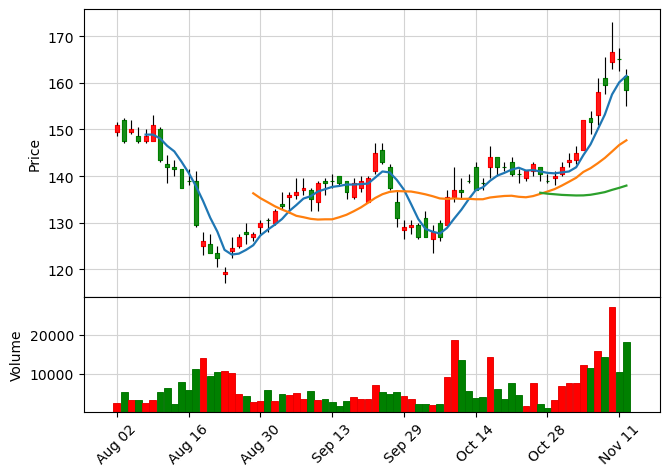

In [3]:
import mplfinance as mpf
import pandas as pd
import numpy as np

data = pd.read_csv('2377.csv', index_col='Date')
data.index = pd.DatetimeIndex(data.index)
data_2021 = data.loc['2021-8-01':,:]
#print(data_2021)
low = data_2021['Low'].min()
high = data_2021['High'].max()
print("最高價為:", high)
print("最低價為:", low)

down = [np.nan]*len(data_2021['Low'])
up = [np.nan]*len(data_2021['Low'])
for i in range(len(data_2021)):
    if low == data_2021['Low'][i]:
        down[i] = low-5
    if high == data_2021['High'][i]:
        up[i] = high+5

mc = mpf.make_marketcolors(up='r', down='g', volume='inherit', edge='inherit')
cs  = mpf.make_mpf_style(marketcolors=mc, gridcolor="lightgray")

mpf.plot(data_2021,type = 'candle', style=cs, volume = True, mav=(5,20,60))